In [16]:
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("../data/curated/marts_downstream_houses.parquet")
df.head()

,id,price,installment,subdistrict,city,description,url,kamar_tidur,kamar_mandi,kamar_pembantu,...,kondisi_perabotan,hook,ruang_tamu,ruang_makan,terjangkau_internet,tags,facilities,house_materials,floor_materials,image_urls
0,hos14911515,1.200000e+09,5000000.0,Parungpanjang,Bogor,Kondisi :\nType 7 X 10\nLuas Tanah 70-84 m2 \n...,https://www.rumah123.com/properti/bogor/hos149...,4,4,0,...,unfurnished,0,1,1,1,"[one_gate_system, perumahan, komplek]","[taman, laundry, keamanan, one_gate_system, pl...",[beton],[keramik],[https://picture.rumah123.com/r123-images/720x...
1,hos15806383,3.940000e+09,17000000.0,Babakanmadang,Bogor,Beberapa alasan mengapa membeli property di ka...,https://www.rumah123.com/properti/bogor/hos158...,2,2,1,...,unfurnished,0,1,1,1,"[bisa_nego, cash_keras, one_gate_system, perum...","[taman, laundry, keamanan, one_gate_system, da...",[bata_hebel],"[keramik, ubin]",[https://picture.rumah123.com/r123-images/720x...
2,hos16012513,4.600000e+08,2000000.0,Cibinong,Bogor,Dekat dengan pemda cibinong\nDekat dengan paka...,https://www.rumah123.com/properti/bogor/hos160...,2,1,0,...,unfurnished,0,1,1,1,"[bisa_nego, cash_keras, kpr, one_gate_system, ...","[keamanan, laundry, keamanan, one_gate_system,...",[bata_hebel],[keramik],[https://picture.rumah123.com/r123-images/720x...
3,hos15730660,7.000000e+09,31000000.0,Tanahsareal,Bogor,Rumah Tempo Doeloe yang di Desain oleh Arsitek...,https://www.rumah123.com/properti/bogor/hos157...,4,3,1,...,unfurnished,0,1,1,1,"[bisa_nego, cash_keras, one_gate_system, perum...","[taman, laundry, keamanan, one_gate_system, da...",[bata_hebel],[keramik],[https://picture.rumah123.com/r123-images/720x...
4,hos13861378,2.400000e+09,10000000.0,Babakanmadang,Bogor,Beberapa alasan Why to choose property in sent...,https://www.rumah123.com/properti/bogor/hos138...,5,4,0,...,semi furnished,0,1,0,1,"[bisa_nego, cash_keras, perumahan, komplek]","[taman, laundry, keamanan, masjid, dapur, wast...",[bata_merah],[keramik],[https://picture.rumah123.com/r123-images/720x...


In [15]:
df_benford = df["price"].astype(str).str[0].value_counts().reset_index().rename(columns={"price": "first_digit"})
df_benford["first_digit"] = df_benford["first_digit"].astype(int)
df_benford["real_proportion"] = df_benford["count"] / df_benford["count"].sum()
df_benford["benford_proportion"] = df_benford["first_digit"].apply(lambda first_digit: np.log10(1 + 1 / first_digit))
df_benford

,first_digit,count,real_proportion,benford_proportion
0,1,5830,0.289416,0.301030
1,2,3150,0.156374,0.176091
2,3,2573,0.127730,0.124939
3,4,2027,0.100625,0.096910
4,5,1643,0.081563,0.079181
5,6,1533,0.076102,0.066947
6,7,1266,0.062847,0.057992
7,8,1150,0.057089,0.051153
8,9,972,0.048253,0.045757


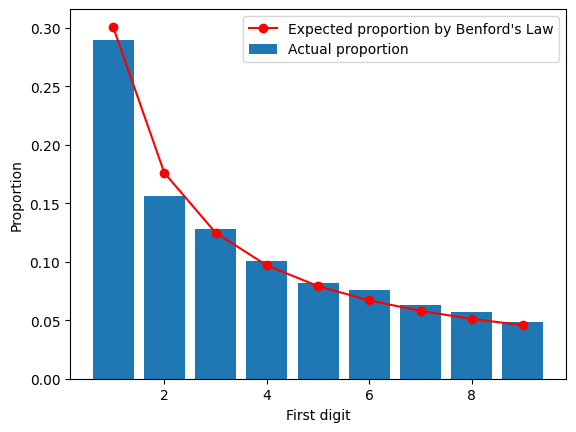

In [14]:
fig, ax = plt.subplots(sharey=True)

ax.bar(df_benford["first_digit"], df_benford["real_proportion"], label="Actual proportion")
ax.plot(df_benford["first_digit"], df_benford["benford_proportion"], label="Expected proportion by Benford's Law", color="red", marker="o")
ax.set_xlabel("First digit")
ax.set_ylabel("Proportion")

ax.legend()
plt.show()

In [ ]:
# H0 = the observed distribution follows Benford's Law
# H1 = the observed distribution does not follow Benford's Law

scipy.stats.chisquare(df_benford["real_proportion"], df_benford["benford_proportion"])

Power_divergenceResult(statistic=0.00541583804023895, pvalue=0.9999999999977645)